<a href="https://colab.research.google.com/github/Nikhild1093/Nikhild1093/blob/main/Gold_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection & Processing

In [ ]:
!pip install kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/gold-price-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'gold-price-data' dataset.
Path to dataset files: /kaggle/input/gold-price-data


In [ ]:
#loading csv into pd dataframe
gold_data=pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#check missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
correlation = gold_data.drop('Date', axis=1).corr()

<Axes: >

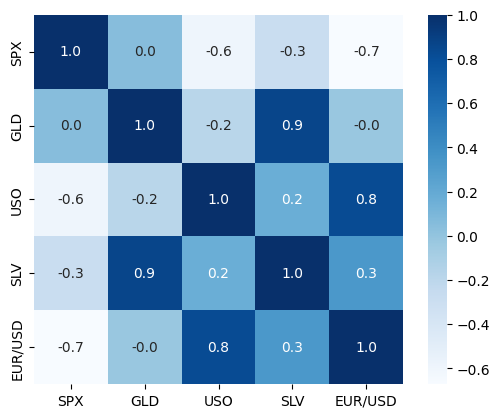

In [ ]:
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, cmap='Blues')

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


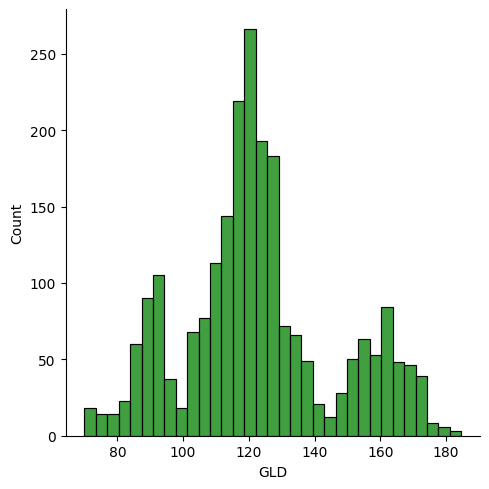

In [ ]:
sns.displot(gold_data['GLD'],color='green')

In [ ]:
#Splitting Features & Target
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [ ]:
#Train/Test Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [ ]:
#Model Training - Random Forest Regressor
regressor=RandomForestRegressor(n_estimators=100)

regressor.fit(X_train,Y_train)


RandomForestRegressor()

In [ ]:
#MNodel Evaluation - Prediction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.72079975  81.94780006 115.8349999  127.67350071 120.87340098
 154.68869689 150.60989864 126.14589998 117.51299872 125.81760078
 116.43780088 171.6656009  141.92519892 168.07989882 115.1955002
 117.70480065 138.47020295 170.37760137 159.12750269 157.92069888
 155.1825001  125.04490024 175.57719966 157.45660418 125.12060053
  93.90820005  76.9586999  120.40830016 119.15169953 167.58829988
  88.23029996 125.28400014  91.20750074 117.73990024 121.06929904
 136.25680087 115.57340105 115.33320072 147.60129973 107.21280131
 104.25060255  87.18439794 126.41120028 117.92109972 153.84289887
 119.70230004 108.44670008 108.08529851  93.29350074 126.94609813
  74.85400045 113.64169941 121.30890009 111.32839935 118.99389896
 120.29669963 160.36119927 170.56180115 146.93499691  85.73849856
  94.45360038  86.72619896  90.51409983 118.95490052 126.33690085
 127.49120013 168.99490015 122.36679916 117.40119908  98.48310022
 167.96580174 143.10529929 132.06550288 121.20890207 121.14499947
 119.876200

In [ ]:
#R Squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared Error : ",error_score)

R Squared Error :  0.9892464891815125


Text(0.5, 1.0, 'Actual vs Predicted')

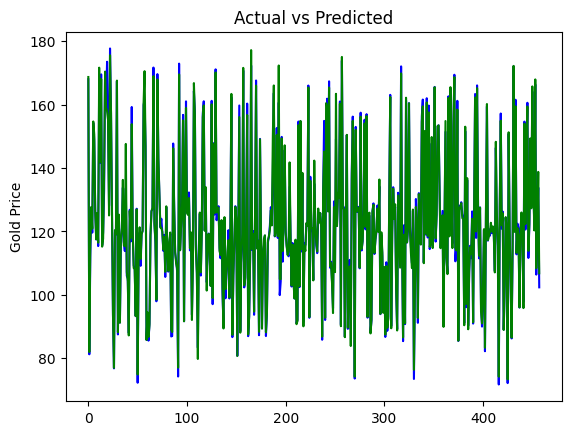

In [ ]:
#Comapre actual vs prediction on graph
Y_test=list(Y_test)

plt.plot(Y_test, color = 'blue', label='Actual')
plt.plot(test_data_prediction,color='green', label='Predicted')
plt.ylabel('Gold Price')
plt.title('Actual vs Predicted')